# Machine Learning Project - Rainfall prediction

**REMARK** 
Error is calculated using 
$$MAPE = \frac{100}{n} \sum_{i =1}^{n} \frac{|Y_i - \hat{Y_i}|}{Y_i + 1}$$

Which is more robust then the $l2-norm$ for dealing with outliers

## 1. Exploration the data

As usual, we load some important and useful libraries for data loading and data visualization

In [141]:
library(ggplot2)
library(tidyr)
library(gridExtra)

We load the dataset as a dataframe

In [142]:
rain = read.delim("rain_project.txt", sep = " ")

In [143]:
summary(rain)

      Id                date                 ff               t        
 Length:688         Length:688         Min.   : 1.158   Min.   :269.5  
 Class :character   Class :character   1st Qu.: 2.870   1st Qu.:279.9  
 Mode  :character   Mode  :character   Median : 3.859   Median :283.2  
                                       Mean   : 4.082   Mean   :283.7  
                                       3rd Qu.: 4.970   3rd Qu.:287.6  
                                       Max.   :12.500   Max.   :299.5  
       td              hu               dd             precip      
 Min.   :267.1   Min.   : 46.75   Min.   : 32.92   Min.   : 0.000  
 1st Qu.:277.6   1st Qu.: 80.53   1st Qu.:158.74   1st Qu.: 0.000  
 Median :281.2   Median : 86.40   Median :222.81   Median : 0.400  
 Mean   :281.1   Mean   : 85.56   Mean   :206.58   Mean   : 2.384  
 3rd Qu.:284.7   3rd Qu.: 92.06   3rd Qu.:260.68   3rd Qu.: 2.600  
 Max.   :291.1   Max.   :100.00   Max.   :343.04   Max.   :34.500  
    ws_arome        

In [144]:
head(rain)

,Id,date,ff,t,td,hu,dd,precip,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome,msl_arome,rain,rain_class
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,22092001_527,2017-06-11,3.945000,289.4087,285.2771,78.78333,246.7500,0.0,3.663785,244.2995,3.0385028,1.4163599,289.2323,285.1709,79.03778,2.3282769,101672.9,0.2,low_rain
2,22092001_65,2016-03-06,3.739583,276.3758,273.4225,81.70000,260.3333,1.2,3.328476,305.6608,2.4638858,-1.8989708,275.8087,273.6726,86.33160,10.6754407,100583.8,4.2,high_rain
3,22092001_210,2016-07-29,3.273750,288.8692,286.7233,87.62083,259.0417,0.2,3.232380,256.0424,2.9638715,0.9856267,289.6274,286.4851,82.30103,4.5823092,101483.0,0.0,no_rain
4,22092001_136,2016-05-16,1.745000,284.2887,280.2158,76.58750,216.5417,0.0,1.720926,139.2973,-0.2606926,-1.3976028,284.7261,280.3673,75.38412,0.9402537,102223.6,0.0,no_rain
5,22092001_33,2016-02-03,5.718750,277.5279,274.5292,81.39167,285.5417,1.6,4.424012,285.5788,3.9400556,-1.4576058,277.7517,274.5907,80.43509,13.9030762,102416.2,0.0,no_rain
6,22092001_363,2016-12-29,1.750000,277.3533,275.1396,86.20417,140.8750,0.2,1.780965,157.8312,0.1446032,0.6620992,275.2941,273.0910,85.25869,0.2059833,103463.9,0.2,low_rain


### 1.1 Elementary Explorations

#### Add a qualitative variable for the **month**

In [145]:
# Get the months
days = as.Date(rain[,'date'])
month = strftime(days, "%m")

# Store the names of all variables
var_names = c(names(rain)[1:2], "month", names(rain)[3:length(names(rain))])
# Add month
rain[,"month"] = month
# Reordering the variables
rain = rain[, var_names]
# head(rain)

In [146]:
var_names

[1] "Id"          "date"        "month"       "ff"          "t"          
 [6] "td"          "hu"          "dd"          "precip"      "ws_arome"   
[11] "p3031_arome" "u10_arome"   "v10_arome"   "t2m_arome"   "d2m_arome"  
[16] "r_arome"     "tp_arome"    "msl_arome"   "rain"        "rain_class"

In [147]:
# Quantitative variables
num_var = var_names[-c(1,2,3,20)]

# Qualitative variables
qual_var = var_names[c(1,2,3,20)]

In [148]:
head(rain)

,Id,date,month,ff,t,td,hu,dd,precip,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome,msl_arome,rain,rain_class
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,22092001_527,2017-06-11,06,3.945000,289.4087,285.2771,78.78333,246.7500,0.0,3.663785,244.2995,3.0385028,1.4163599,289.2323,285.1709,79.03778,2.3282769,101672.9,0.2,low_rain
2,22092001_65,2016-03-06,03,3.739583,276.3758,273.4225,81.70000,260.3333,1.2,3.328476,305.6608,2.4638858,-1.8989708,275.8087,273.6726,86.33160,10.6754407,100583.8,4.2,high_rain
3,22092001_210,2016-07-29,07,3.273750,288.8692,286.7233,87.62083,259.0417,0.2,3.232380,256.0424,2.9638715,0.9856267,289.6274,286.4851,82.30103,4.5823092,101483.0,0.0,no_rain
4,22092001_136,2016-05-16,05,1.745000,284.2887,280.2158,76.58750,216.5417,0.0,1.720926,139.2973,-0.2606926,-1.3976028,284.7261,280.3673,75.38412,0.9402537,102223.6,0.0,no_rain
5,22092001_33,2016-02-03,02,5.718750,277.5279,274.5292,81.39167,285.5417,1.6,4.424012,285.5788,3.9400556,-1.4576058,277.7517,274.5907,80.43509,13.9030762,102416.2,0.0,no_rain
6,22092001_363,2016-12-29,12,1.750000,277.3533,275.1396,86.20417,140.8750,0.2,1.780965,157.8312,0.1446032,0.6620992,275.2941,273.0910,85.25869,0.2059833,103463.9,0.2,low_rain


### 1.2. Deal with **qualitative variables**

In [149]:
for (var in qual_var)
{
    rain[, var] <- as.factor(rain[, var])
}
# rain[, "Id"] <- as.factor(rain[, "Id"])
# rain[, "date"] <- as.factor(rain[, "date"])
# rain[, "rain_class"] <- as.factor(rain[, "rain_class"])

In [150]:
summary(rain[,qual_var])

            Id              date         month         rain_class 
 22092001_1  :  1   2016-01-02:  1   03     : 62   high_rain:188  
 22092001_10 :  1   2016-01-03:  1   07     : 62   low_rain :292  
 22092001_100:  1   2016-01-04:  1   01     : 61   no_rain  :208  
 22092001_101:  1   2016-01-05:  1   06     : 59                  
 22092001_102:  1   2016-01-06:  1   11     : 59                  
 22092001_103:  1   2016-01-07:  1   05     : 58                  
 (Other)     :682   (Other)   :682   (Other):327                  

Histogram of `rain`  by  `month`

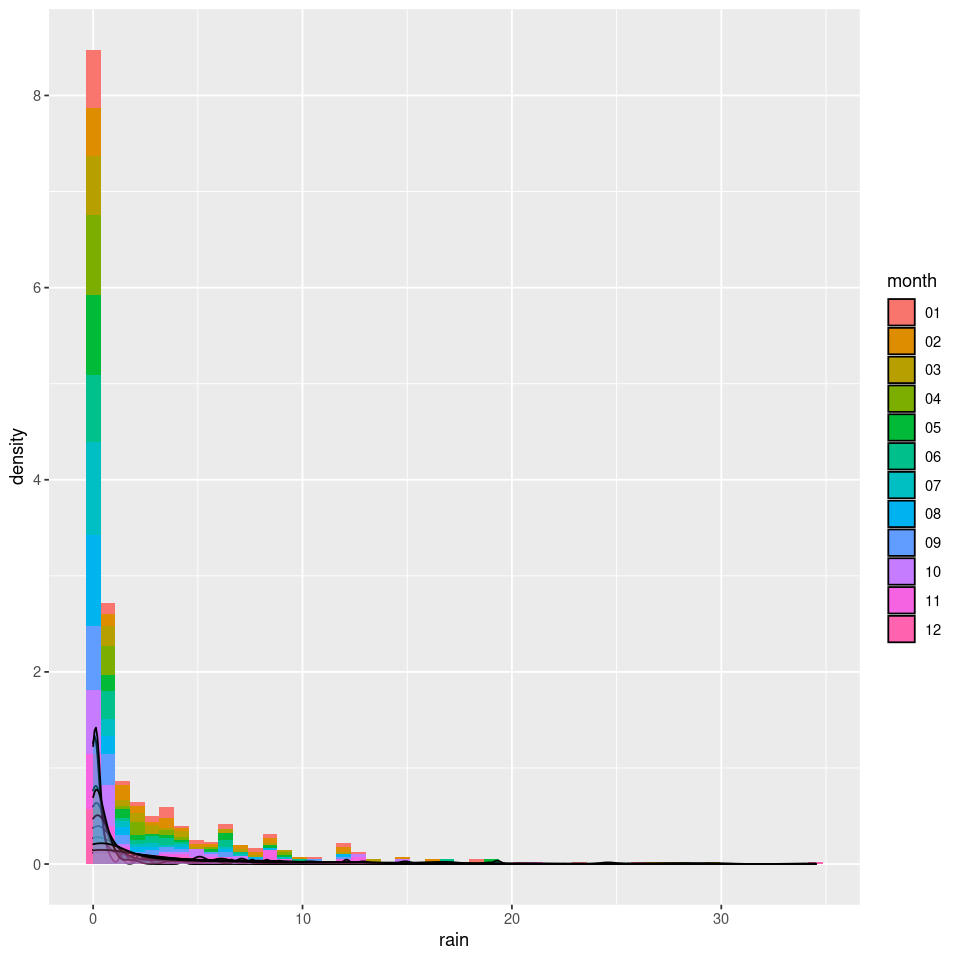

In [159]:
options(repr.plot.width = 8, repr.plot.height = 8)
ggplot(data = rain, aes_string(x = "rain", fill = 'month')) + 
    geom_histogram(aes(y = ..density..), bins = 50) + 
    geom_density(alpha =0.26)

### Histogram to see the distributions of variables

We plot as below the histograms of all quantitative variables to have an insight of the distributions of these variables

In [152]:
num_var

[1] "ff"          "t"           "td"          "hu"          "dd"         
 [6] "precip"      "ws_arome"    "p3031_arome" "u10_arome"   "v10_arome"  
[11] "t2m_arome"   "d2m_arome"   "r_arome"     "tp_arome"    "msl_arome"  
[16] "rain"

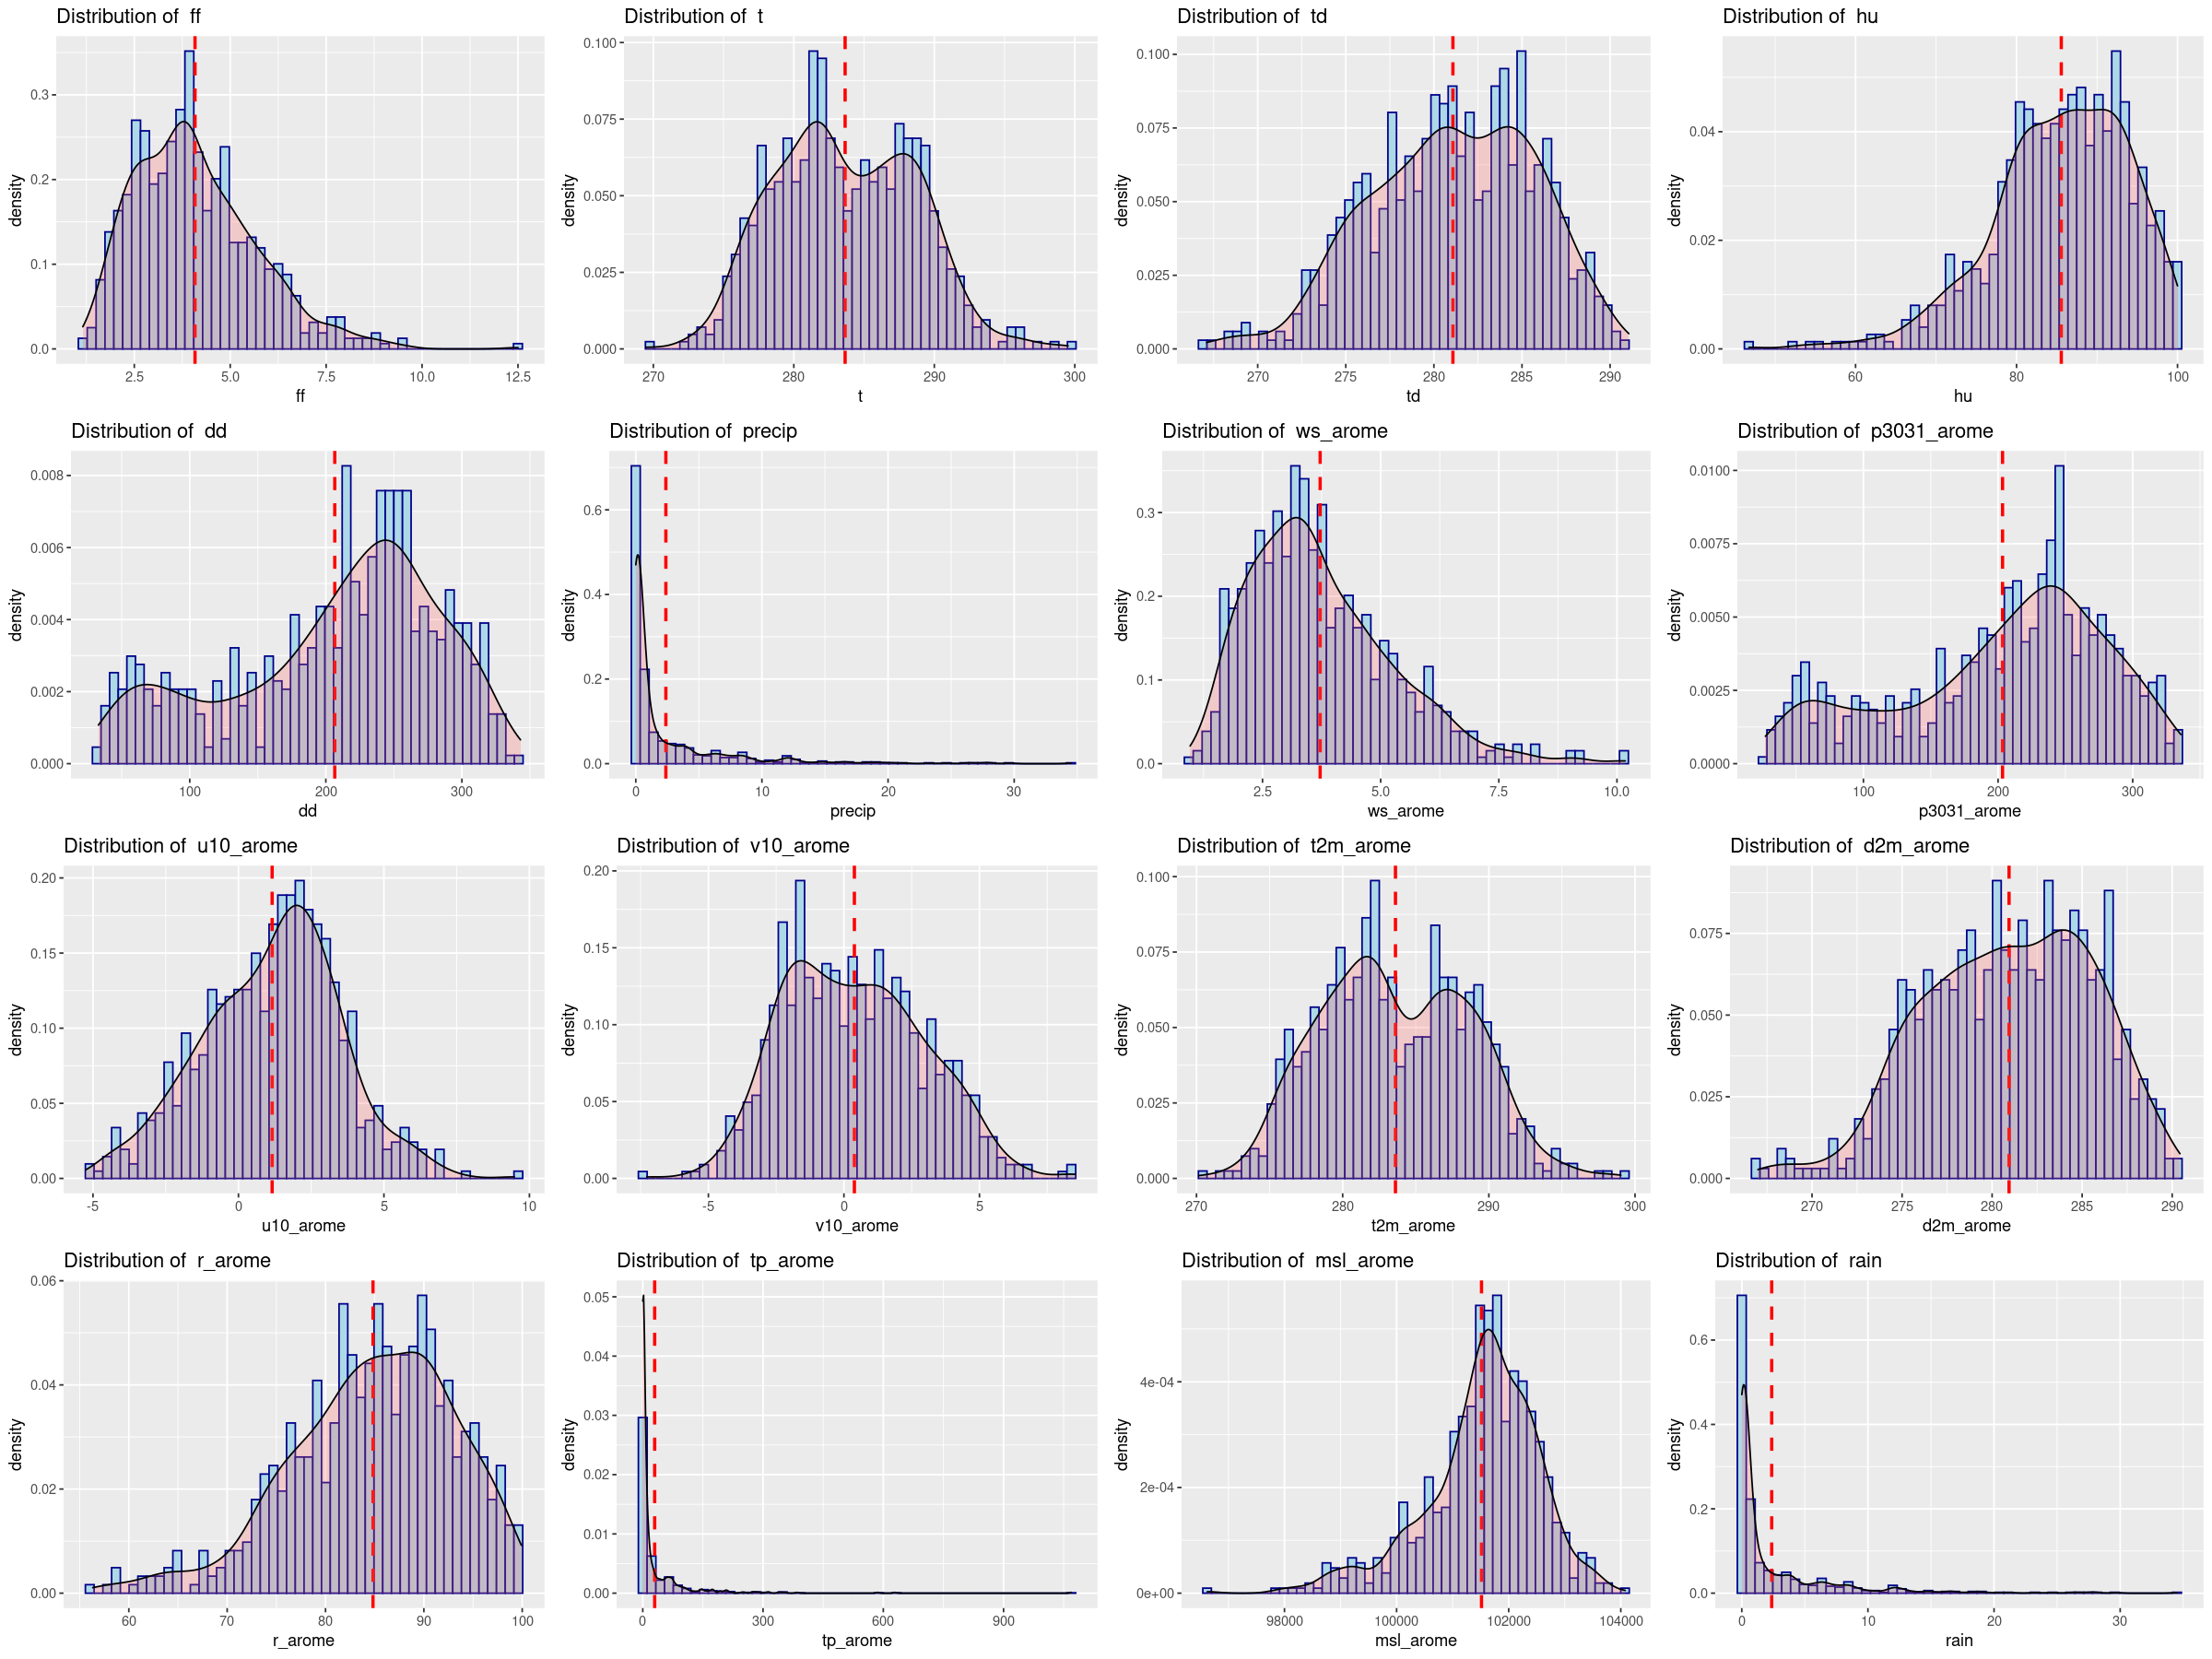

In [153]:
# Use lapply 

my_plots_list <- lapply(num_var, function(each_variable) {
  mean_val = mean(rain[, each_variable])[[1]]
  ggplot(data = rain, aes_string(x = each_variable)) + # Create a graphic object by ggplot  
    geom_histogram(aes(y = ..density..), bins = 50, color = "darkblue", fill="lightblue") +  # Add histogram 
    geom_vline(aes(xintercept = mean_val), color="red", linetype="dashed", size=1) +  # Add the mean (vertical line)
    geom_density(alpha=.25, fill="#FF6666") +   # Add the density approximation
    ggtitle(paste("Distribution of ",each_variable))
})

options(repr.plot.width = 20, repr.plot.height = 15)
gridExtra::grid.arrange(grobs = my_plots_list, ncol = 4)

From these histograms, we can remark that the distribution of some variables are not summetric. So we propose here some elementary transformations to make some distributions more symmetric and more "gaussian" 

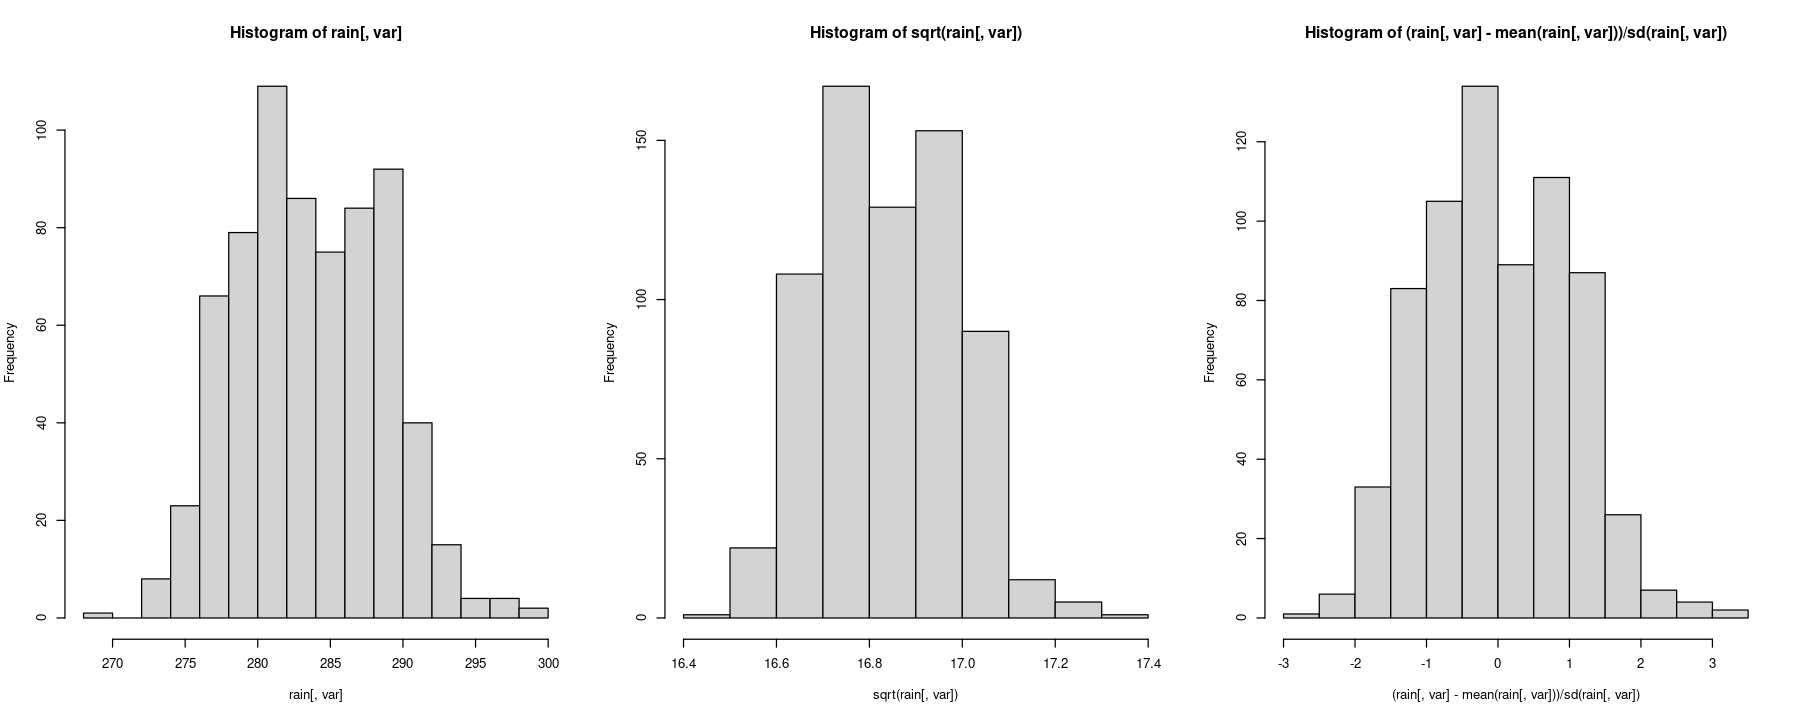

In [154]:
par(mfrow = c(1, 3))
options(repr.plot.width = 15, repr.plot.height = 6)
var = 't'
hist(rain[,var])
hist(sqrt(rain[,var]))
hist((rain[,var] - mean(rain[,var]))/sd(rain[,var]))

In [155]:
rain[, "precip_log"] <- log(rain[, "precip"] + 1)
rain[, "tp_arome_log"] <- log(rain[, "tp_arome"] + 1)
rain[, "rain_log"] <- log(rain[, "rain"] + 1)

num_var = c(num_var, "precip_log", "tp_arome_log", "rain_log" )

Moreover, we can see that the data are in different range, for example, ... So we need to normalize the data

### Data normalization

We will normalize the data to have zero mean and unit standard deviation for each varariable

In [156]:
rain_scaled = rain
rain_scaled[num_var] = scale(rain_scaled[num_var], center = TRUE, scale = TRUE)   

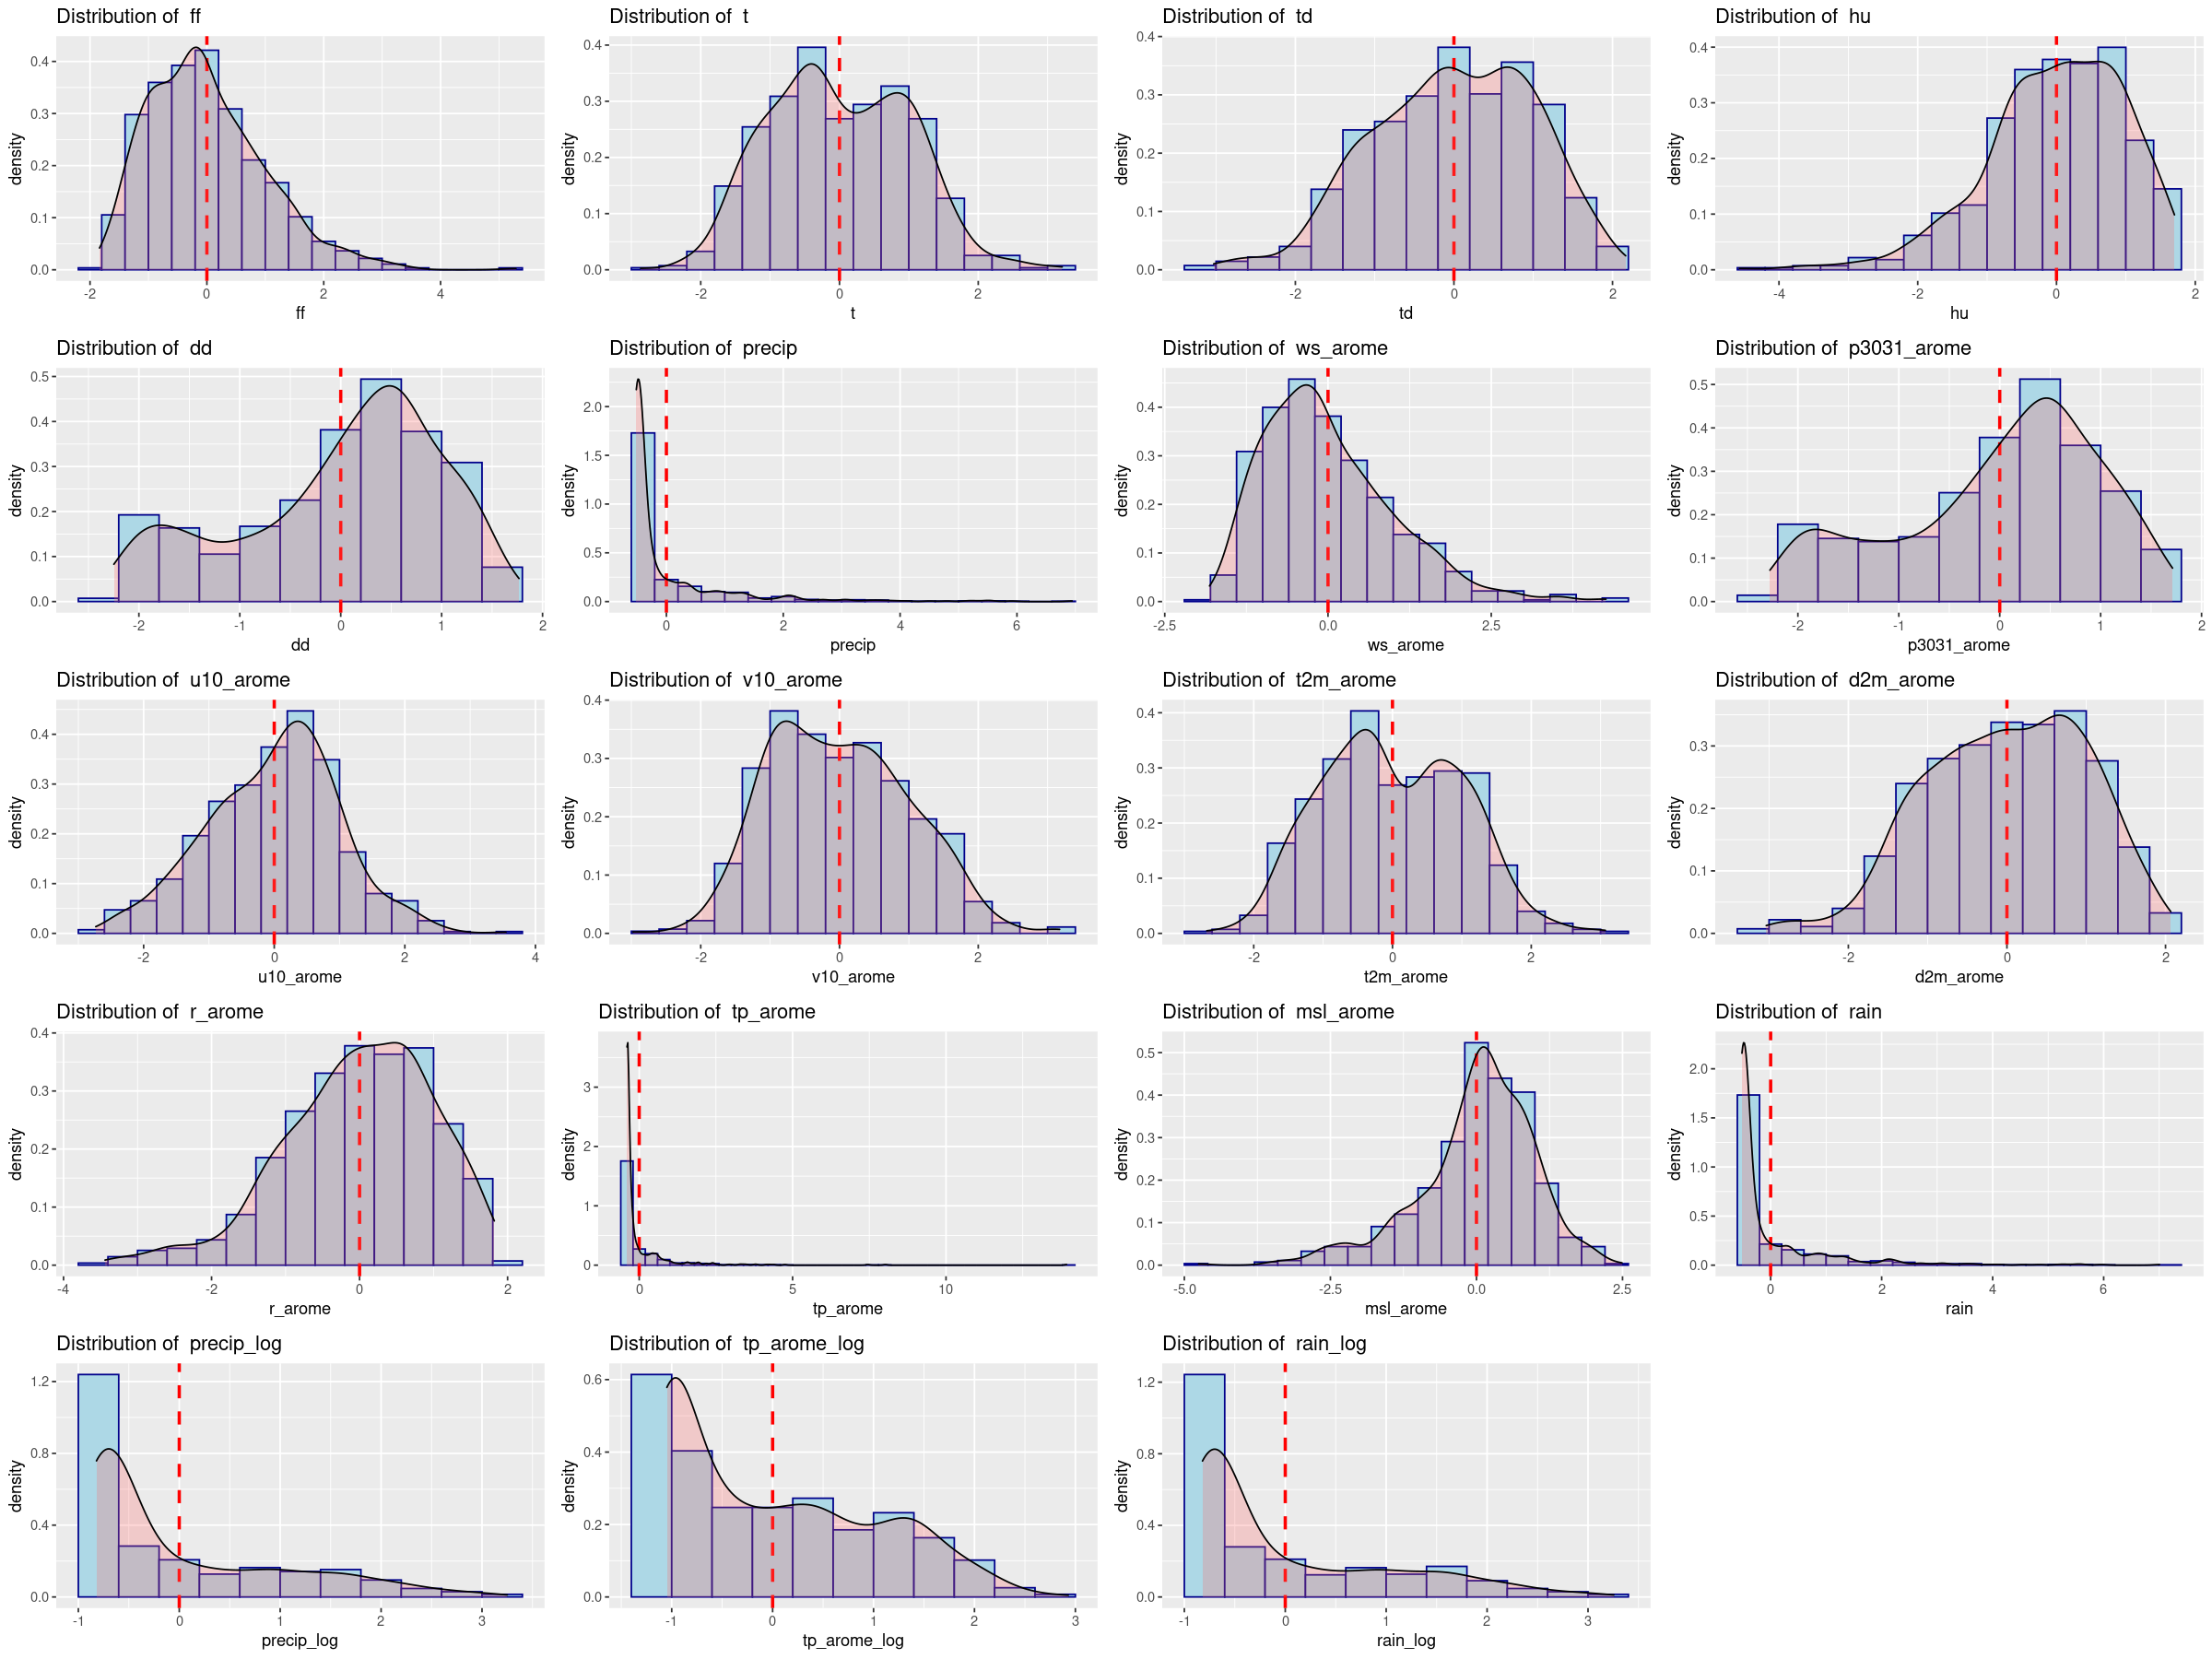

In [157]:
hist_list_scaled <- lapply(num_var, function(each_variable) {
  mean_val = mean(rain_scaled[, each_variable])[[1]]
  ggplot(data = rain_scaled, aes_string(x = each_variable)) + # Create a graphic object by ggplot  
    geom_histogram(aes(y = ..density..), binwidth = 0.4, color = "darkblue", fill="lightblue") +  # Add histogram 
    geom_vline(aes(xintercept = mean_val), color="red", linetype="dashed", size=1) +  # Add the mean (vertical line)
    geom_density(alpha=.25, fill="#FF6666") +   # Add the density approximation
    ggtitle(paste("Distribution of ",each_variable))
})

options(repr.plot.width = 20, repr.plot.height = 15)
gridExtra::grid.arrange(grobs = hist_list_scaled, ncol = 4)

### Deal with outliers

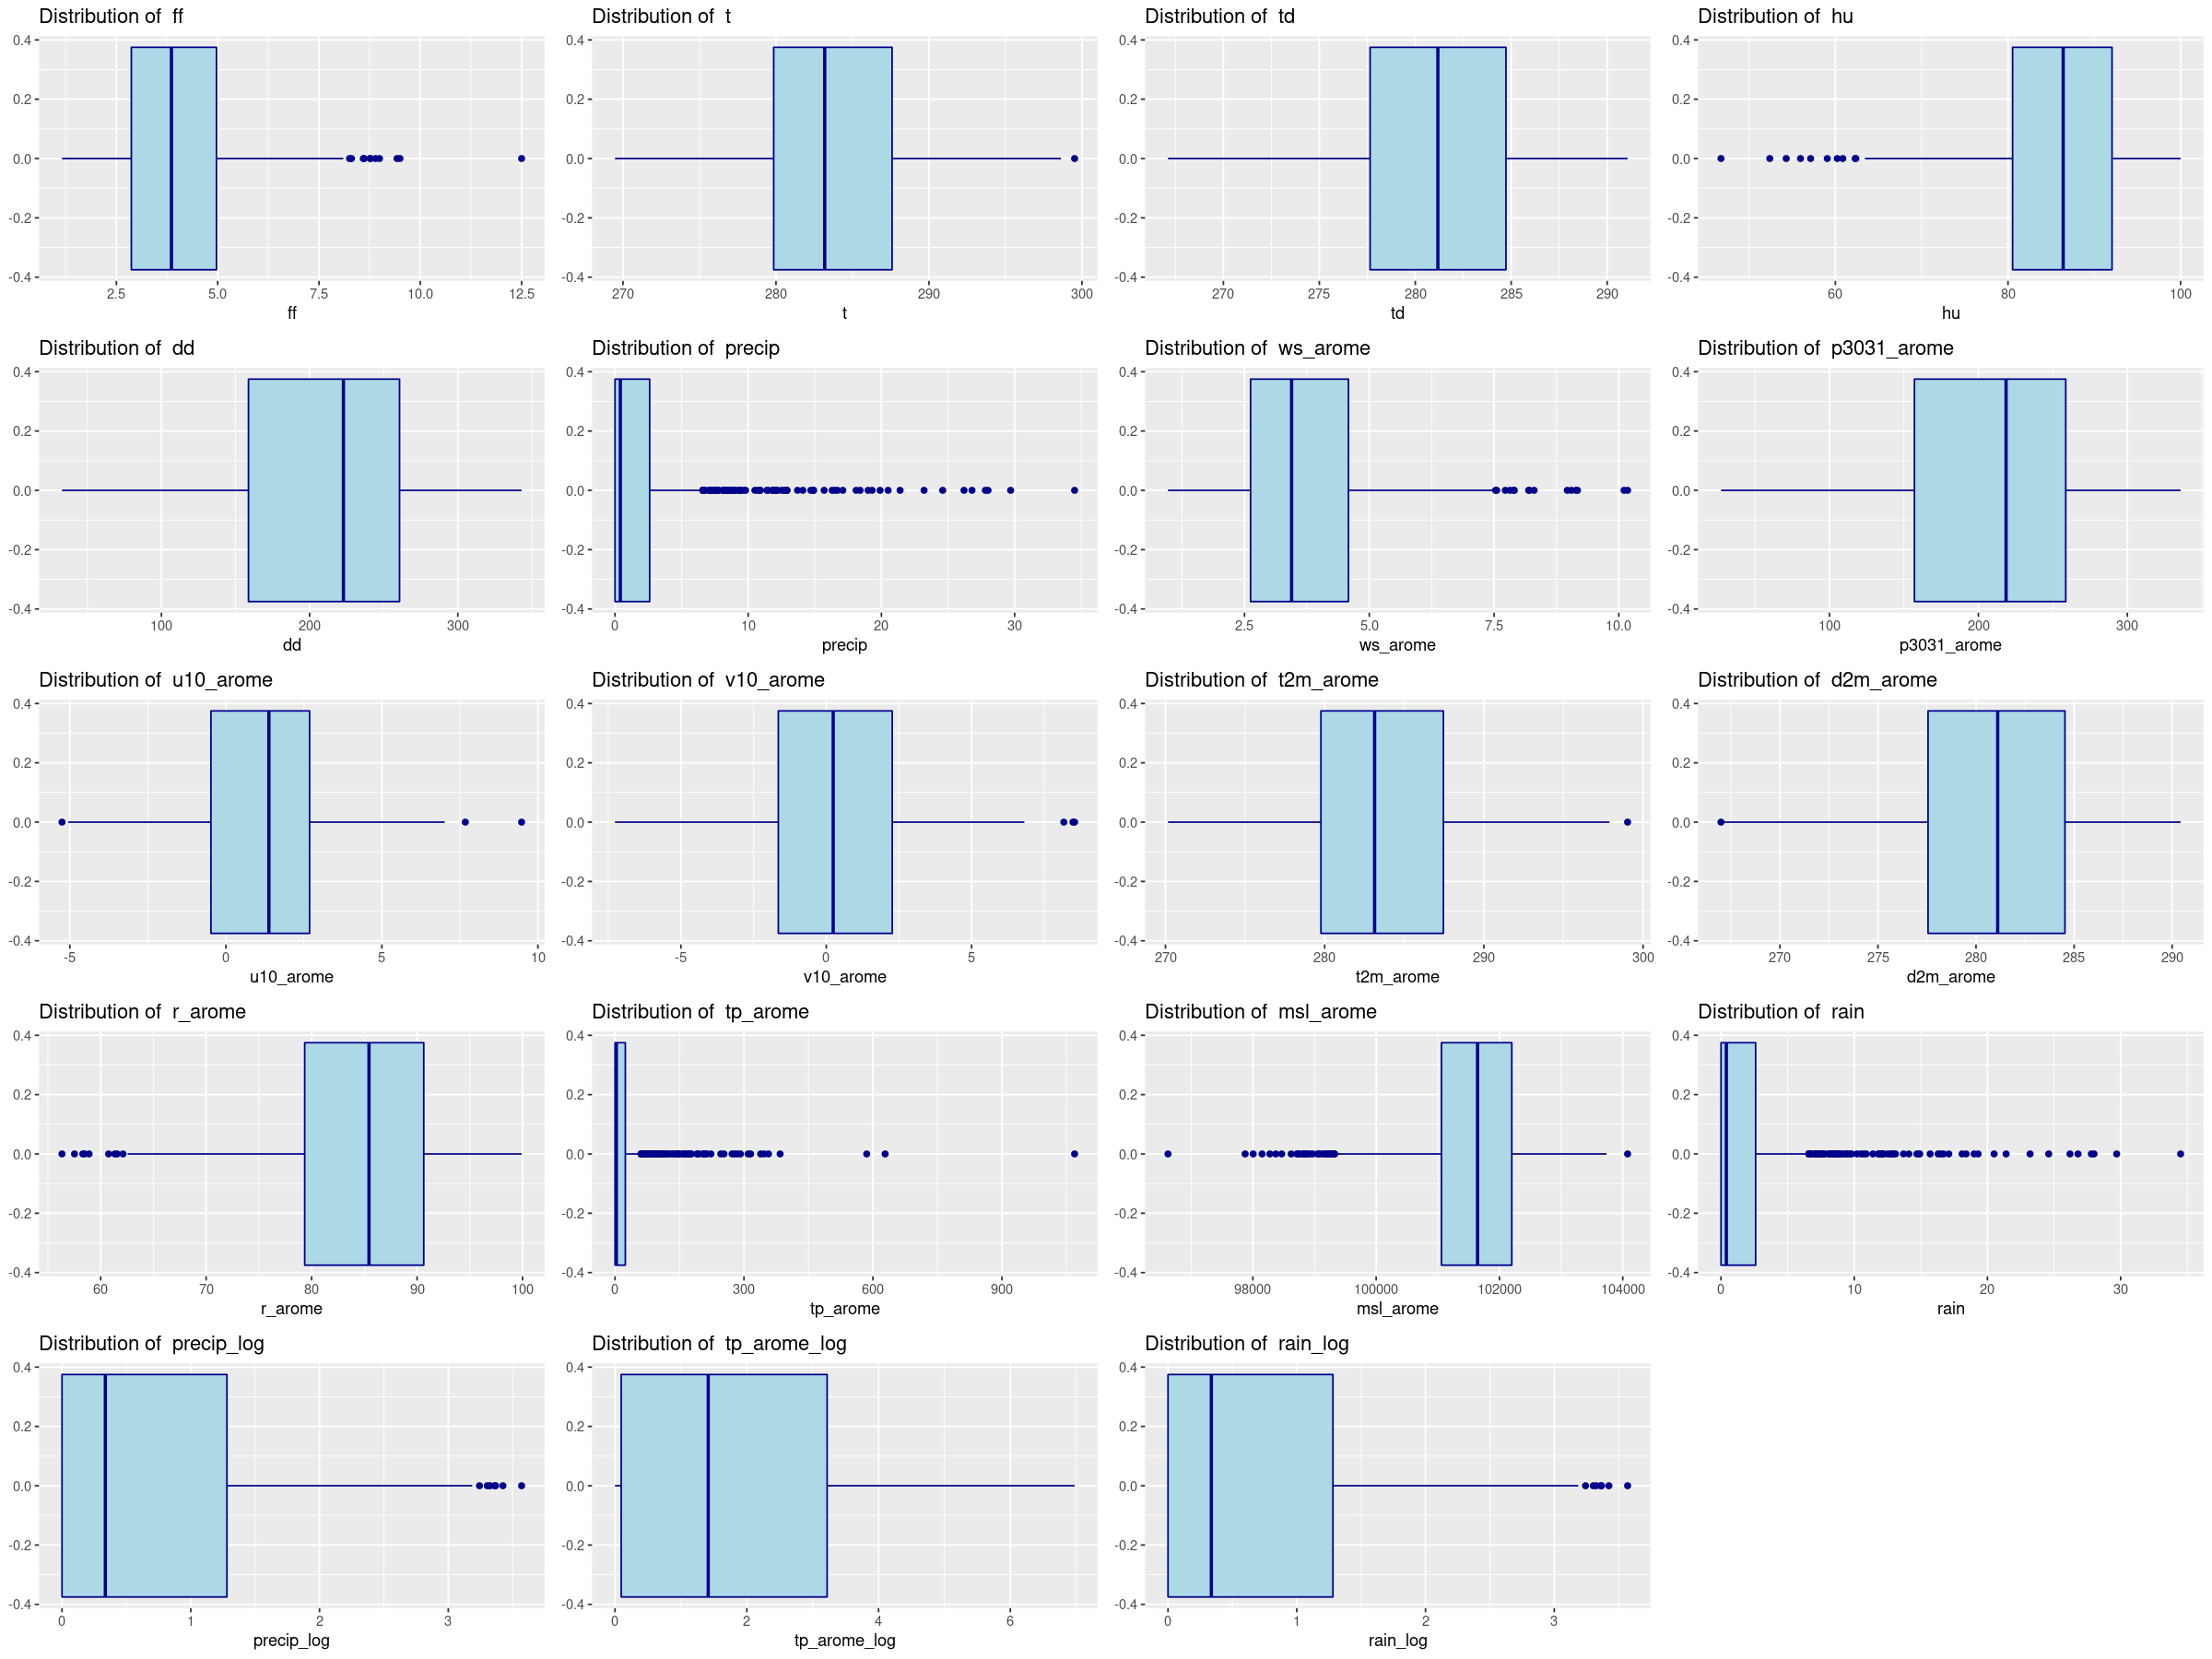

In [158]:
box_list <- lapply(num_var, function(each_variable) {
  mean_val = mean(rain[, each_variable])[[1]]
  ggplot(data = rain, aes_string(x = each_variable)) + # Create a graphic object by ggplot  
    geom_boxplot(color = "darkblue", fill="lightblue") +
    ggtitle(paste("Distribution of ",each_variable))
})

options(repr.plot.width = 20, repr.plot.height = 15)
gridExtra::grid.arrange(grobs = box_list, ncol = 4)

There are less outliers than original data.

### Scatter plot

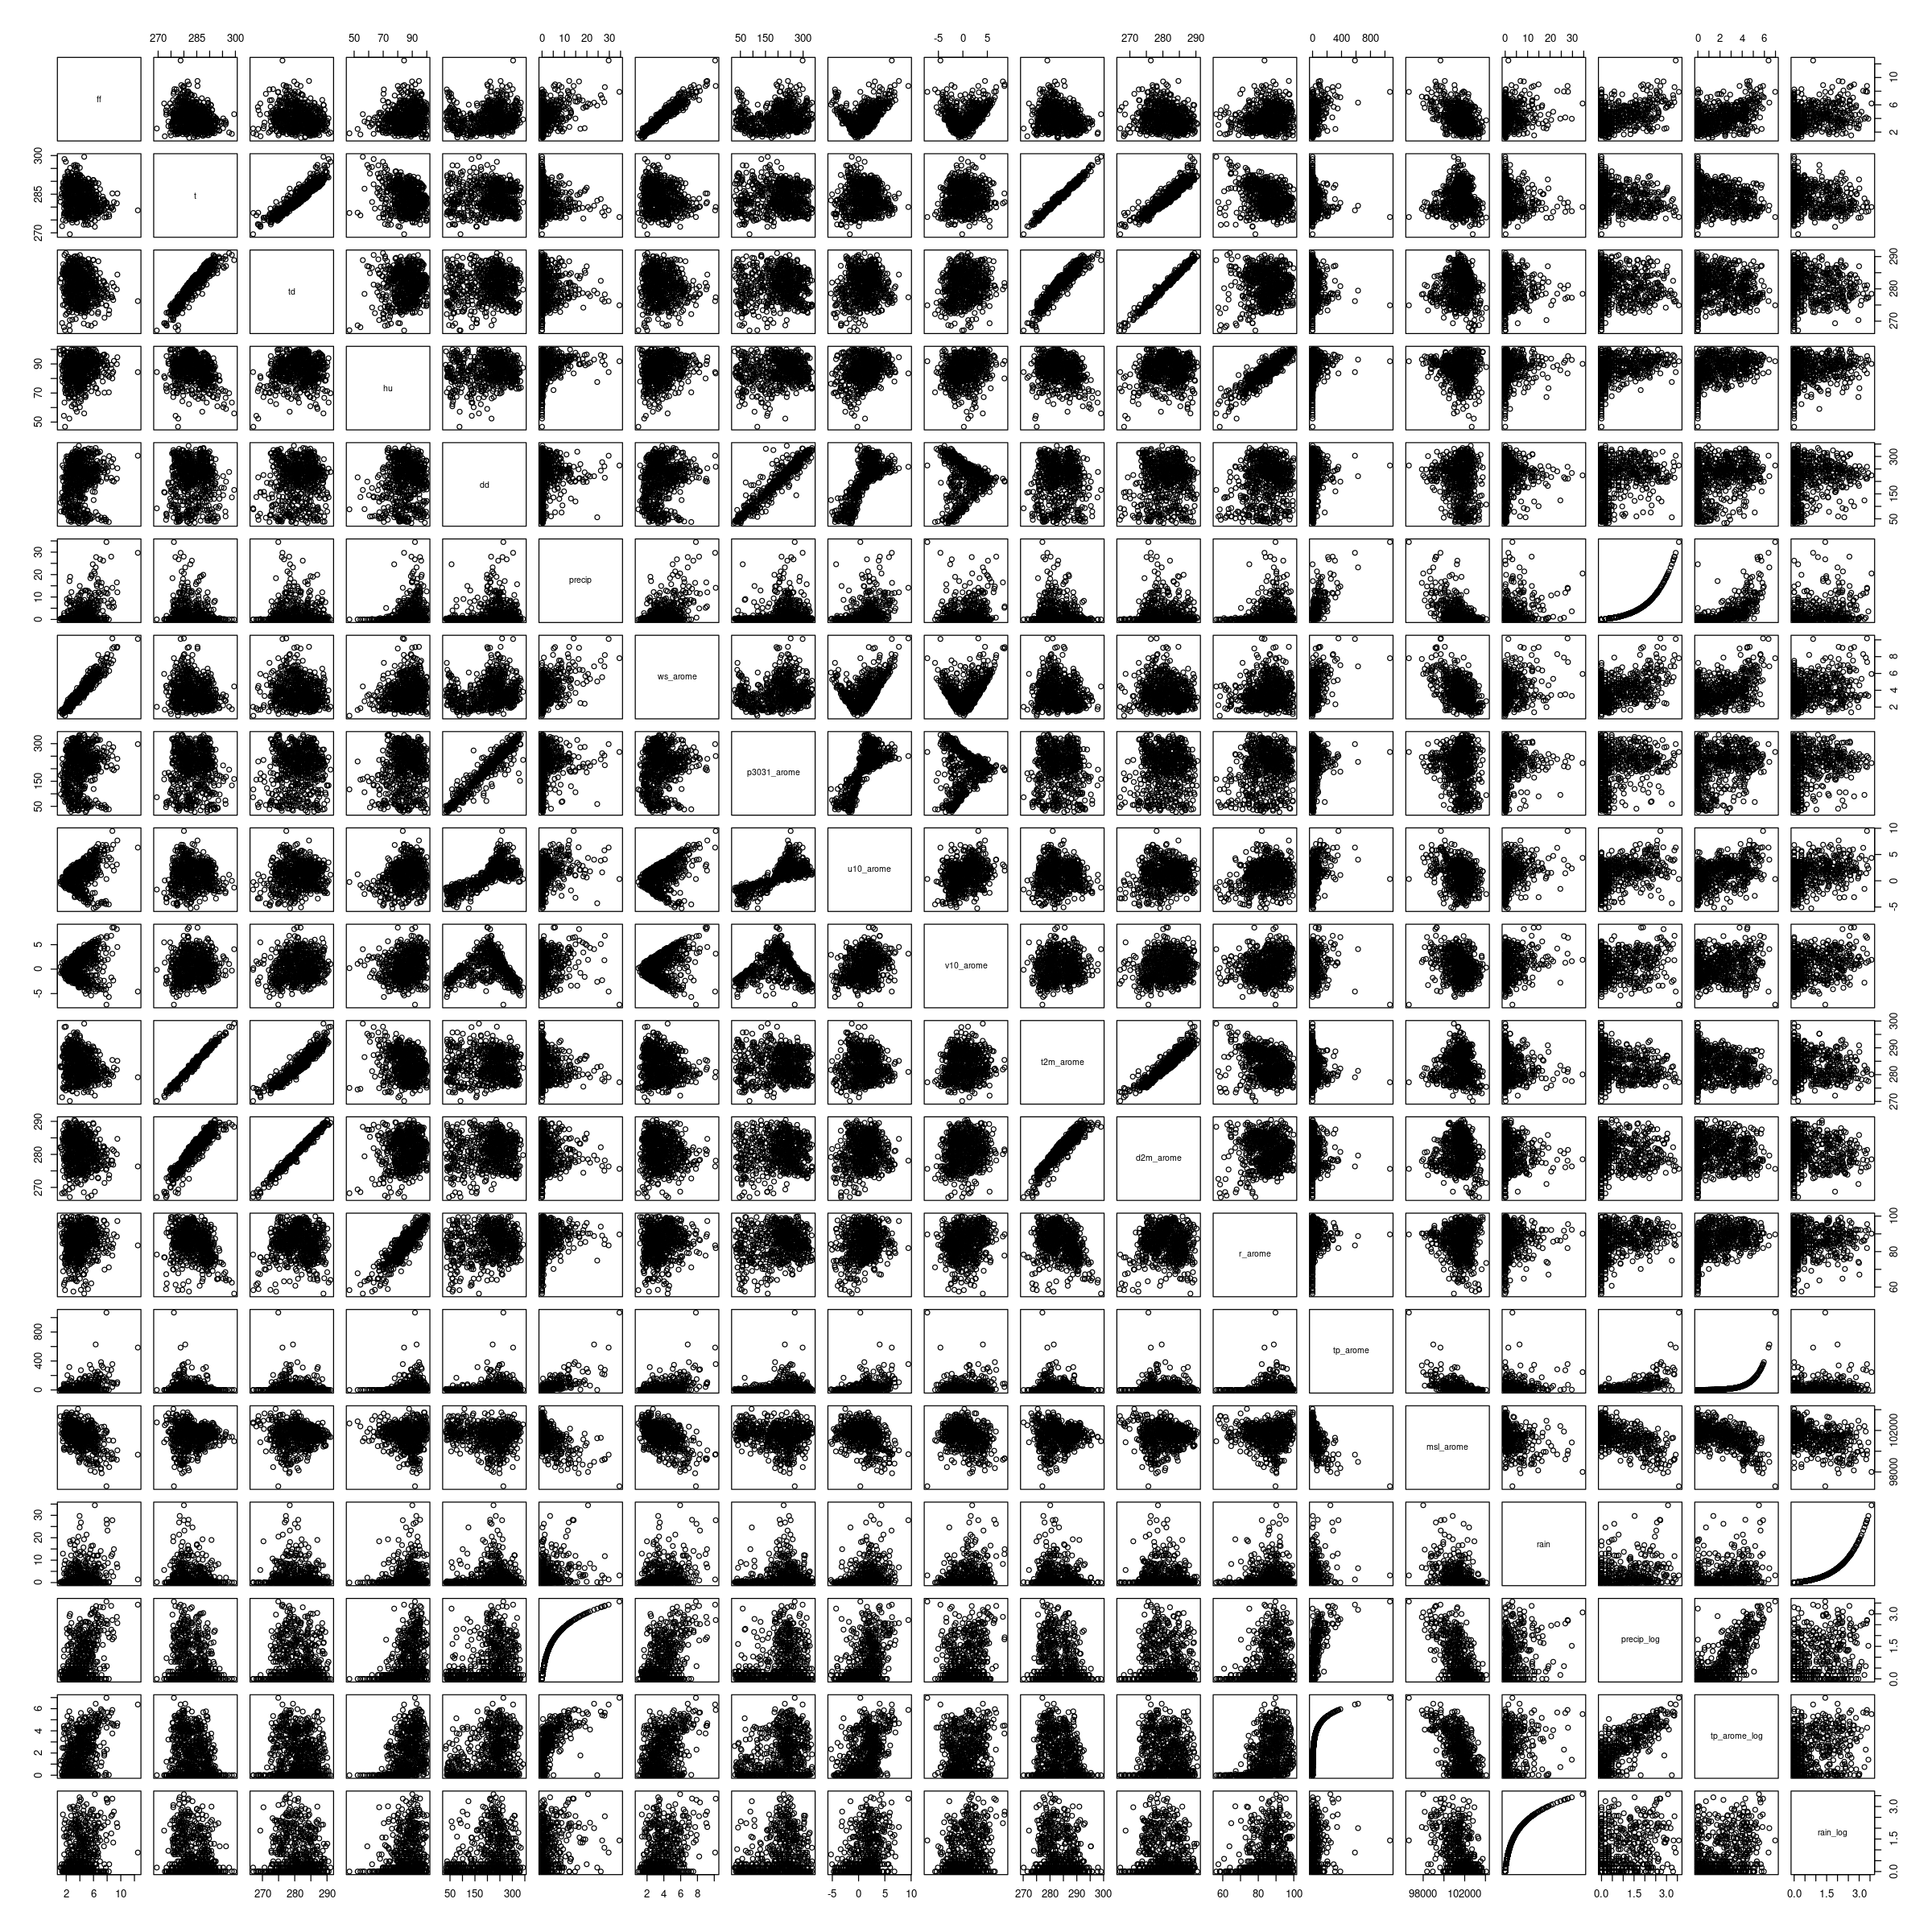

In [162]:
options(repr.plot.width = 20, repr.plot.height = 20)
pairs(rain[,num_var])

In [164]:
library(ggcorrplot)

In [171]:
length(num_var)

[1] 19

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


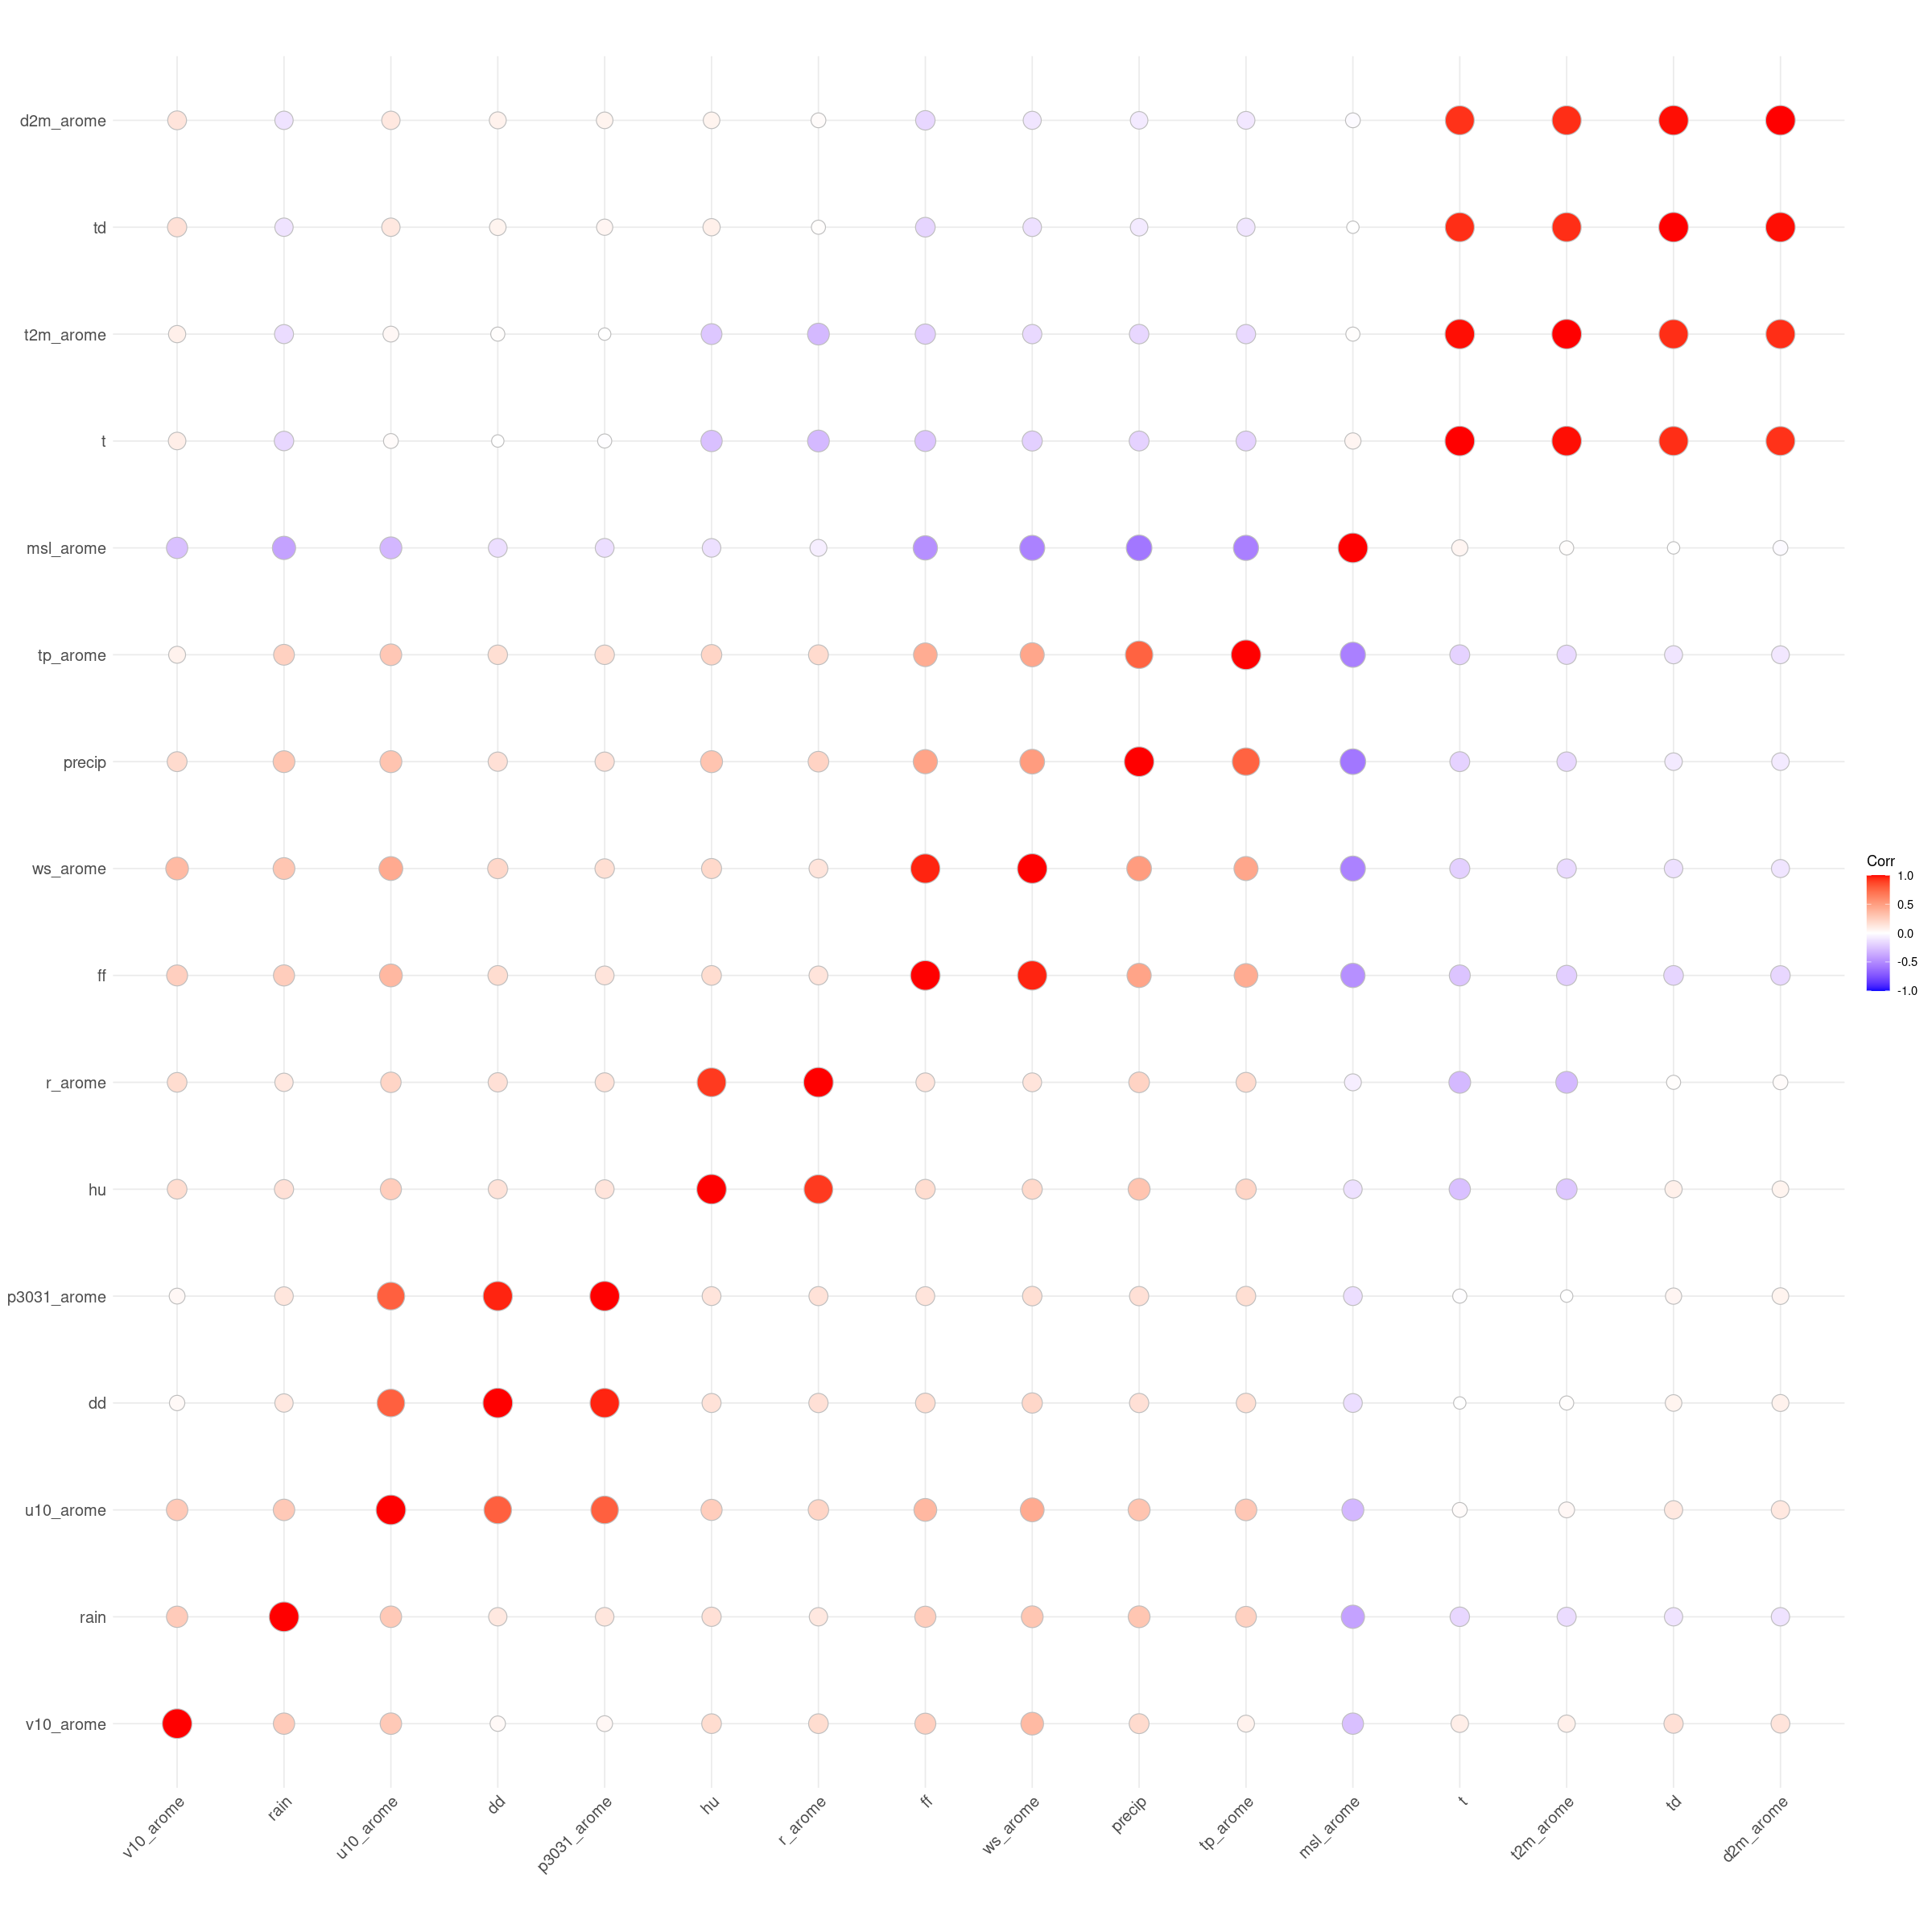

In [172]:
num_var_log = num_var[-c(17,18,19)]
corr = cor(rain[,num_var_log])
ggcorrplot(corr,hc.order = TRUE, method = "circle")

# Machine Learning model for prediction

### Proposed outline

1. Regression
    Linear, logistic, Lasso and Rigde, ...

2. SVM  
    SVM, Kernel trick, ...

3. Decision tree, random forest

4. Neural Network

## 1. Linear Regression